## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Loading the cleaned dataset

In [3]:
df = pd.read_csv('df_cleaned.csv')
X = df.drop(columns=['duration_ms', 'id'])
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.390,0.0692,-23.312,0.0905,0.435000,0.504000,0.0822,0.0433,76.465
1,0.452,0.1810,-20.949,0.0290,0.881000,0.941000,0.0678,0.0847,109.980
2,0.397,0.9850,-1.910,0.0899,0.016200,0.000129,0.1080,0.3630,164.027
3,0.206,0.8870,-4.186,0.1680,0.000228,0.001240,0.2910,0.2320,95.081
4,0.646,0.2790,-3.575,0.0545,0.149000,0.915000,0.0993,0.7150,120.063
...,...,...,...,...,...,...,...,...,...
70580,0.655,0.7820,-4.789,0.1850,0.375000,0.000000,0.3170,0.8320,79.427
70581,0.755,0.8320,-4.869,0.0462,0.317000,0.000019,0.2190,0.8880,95.044
70582,0.476,0.6880,-7.799,0.2450,0.095300,0.000648,0.4380,0.3530,140.555
70583,0.506,0.8970,-4.632,0.2600,0.146000,0.000451,0.0868,0.5250,188.030


## Scaling features

In [3]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,70585.000000,70585.000000,70585.000000,70585.000000,70585.000000,70585.000000,70585.000000,70585.000000,70585.000000,7.058500e+04
mean,0.535437,0.526475,-11.250279,0.082668,0.412864,0.258829,0.181851,0.424891,118.022762,2.262695e+05
std,0.193214,0.292733,7.848633,0.107621,0.375991,0.379732,0.156393,0.265407,30.675150,1.221169e+05
min,0.053500,0.000020,-48.459000,0.022100,0.000000,0.000000,0.009720,0.000000,31.237000,6.000000e+04
25%,0.410000,0.285000,-13.793000,0.035600,0.038700,0.000001,0.097000,0.198000,94.014000,1.709160e+05
50%,0.555000,0.557000,-8.601000,0.046200,0.300000,0.001180,0.117000,0.398000,118.008000,2.073160e+05
75%,0.679000,0.777000,-5.867000,0.077100,0.814000,0.677000,0.207000,0.633000,137.749000,2.513330e+05
max,0.984000,1.000000,4.140000,0.964000,0.996000,1.000000,0.993000,0.999000,224.536000,5.080070e+06


In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.390,0.0692,-23.312,0.0905,0.435000,0.504000,0.0822,0.0433,76.465
1,0.452,0.1810,-20.949,0.0290,0.881000,0.941000,0.0678,0.0847,109.980
2,0.397,0.9850,-1.910,0.0899,0.016200,0.000129,0.1080,0.3630,164.027
3,0.206,0.8870,-4.186,0.1680,0.000228,0.001240,0.2910,0.2320,95.081
4,0.646,0.2790,-3.575,0.0545,0.149000,0.915000,0.0993,0.7150,120.063


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.752728,-1.562097,-1.536803,0.072772,0.058874,0.645647,-0.637186,-1.437766,-1.354779
1,-0.431838,-1.180177,-1.235730,-0.498680,1.245082,1.796467,-0.729263,-1.281778,-0.262193
2,-0.716498,1.566370,1.190060,0.067197,-1.054992,-0.681275,-0.472216,-0.233193,1.499734
3,-1.705046,1.231592,0.900071,0.792895,-1.097472,-0.678349,0.697924,-0.726777,-0.747899
4,0.572237,-0.845399,0.977920,-0.261737,-0.701789,1.727997,-0.527846,1.093081,0.066512


In [5]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04,7.058500e+04
mean,2.090148e-16,-5.652960e-16,1.749523e-17,1.249534e-16,2.121931e-15,-1.827812e-14,-9.707881e-16,-1.476462e-16,2.507026e-16,-2.891249e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.494331e+00,-1.798423e+00,-4.740824e+00,-5.627944e-01,-1.098078e+00,-6.816149e-01,-1.100639e+00,-1.600912e+00,-2.829208e+00,-1.361571e+00
25%,-6.492148e-01,-8.249023e-01,-3.239722e-01,-4.373537e-01,-9.951496e-01,-6.816115e-01,-5.425522e-01,-8.548835e-01,-7.826835e-01,-4.532866e-01
50%,1.012534e-01,1.042780e-01,3.375490e-01,-3.388594e-01,-3.001805e-01,-6.785074e-01,-4.146681e-01,-1.013188e-01,-4.812524e-04,-1.552093e-01
75%,7.430331e-01,8.558208e-01,6.858923e-01,-5.173942e-02,1.066885e+00,1.101235e+00,1.608106e-01,7.841197e-01,6.430735e-01,2.052430e-01
max,2.321604e+00,1.617612e+00,1.960900e+00,8.189255e+00,1.550943e+00,1.951841e+00,5.186658e+00,2.163143e+00,3.472322e+00,3.974746e+01


Now, all features will have the same weight.

## Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

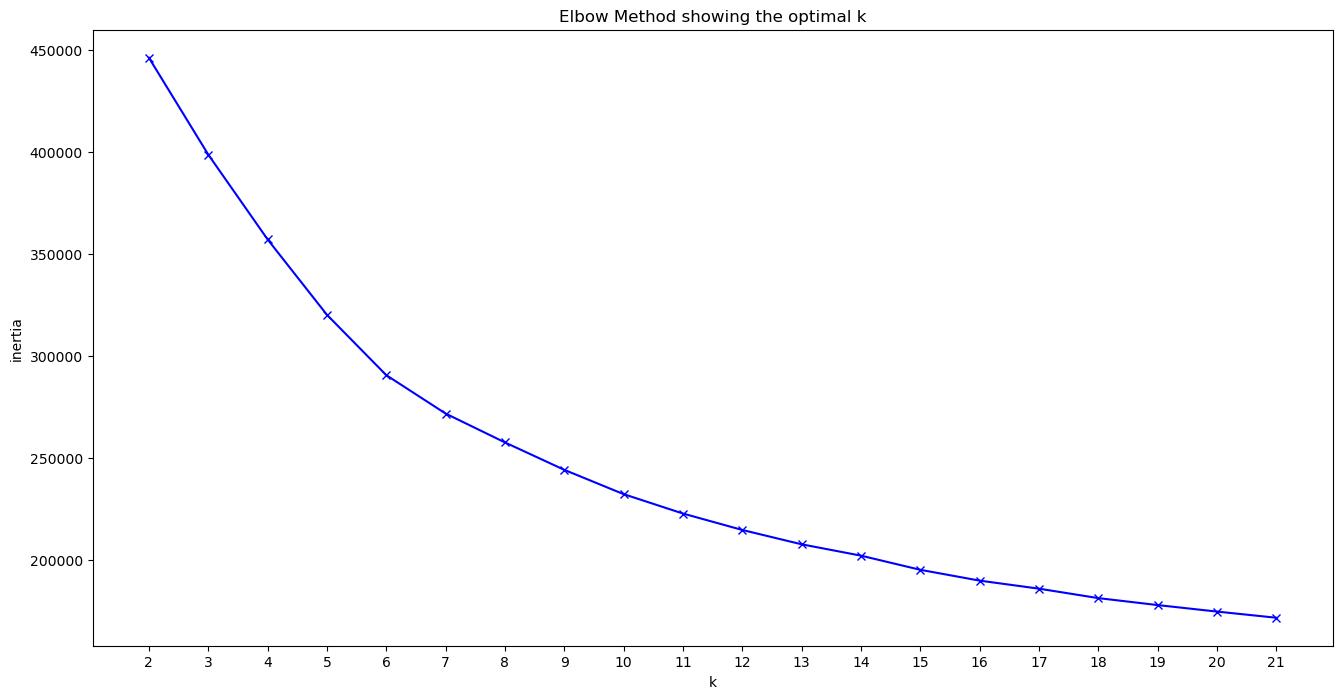

In [5]:
K = range(2, 22)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

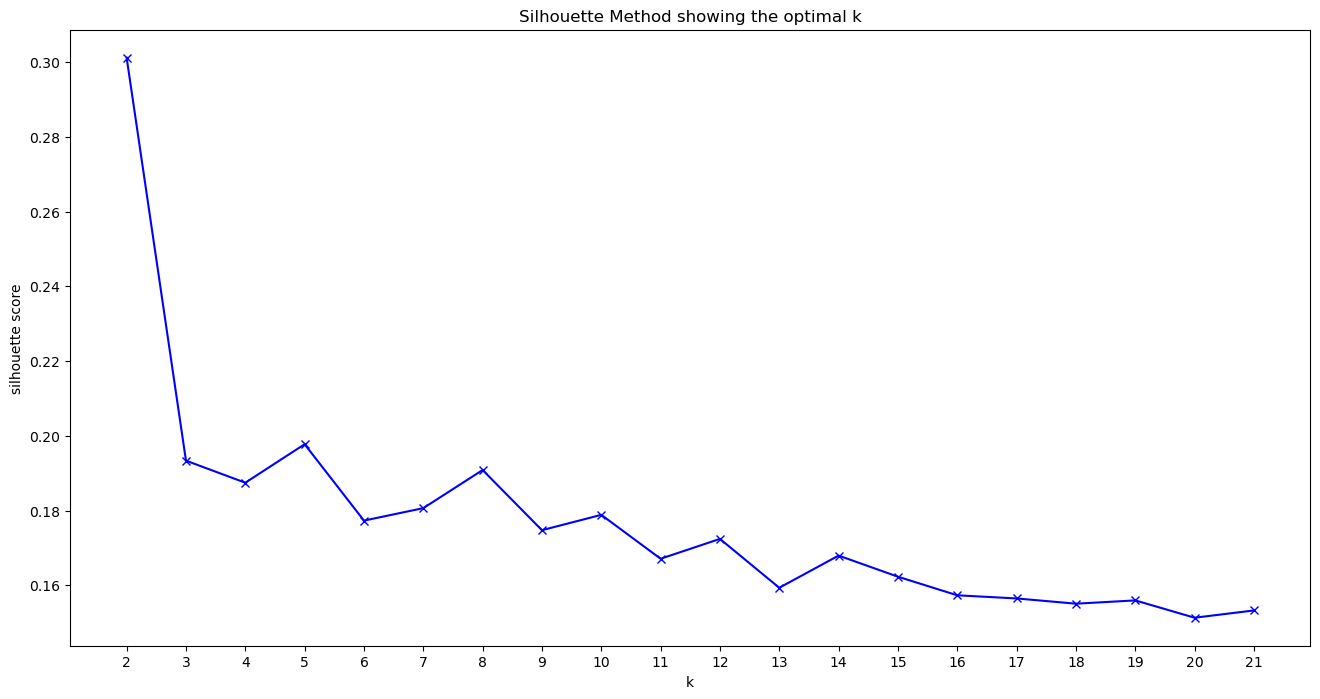

In [8]:
K = range(2, 22)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

## Clustering the songs with K-Means

In [6]:
kmeans = KMeans(n_clusters=20, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=20, random_state=1234)

In [7]:
kmeans.labels_

array([ 4,  1,  0, ...,  7,  7, 16], dtype=int32)

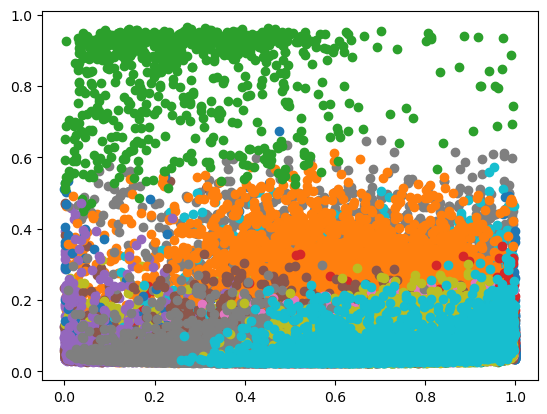

In [8]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [9]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     4001
1     4386
2     6960
3     3941
4     4931
5     3148
6     5562
7     1830
8     4077
9     2225
10    1016
11    2249
12     720
13    2674
14    2593
15    3220
16    3685
17    4912
18    4040
19    4415
dtype: int64

after checking, it appears that cat.6 is spoken word content while cat.7 is mostly live concerts

Now let's see to which group was assigned every song.

In [10]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters

## Now adding back the ID column

In [12]:
X["id"] = df.id
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
0,0.390,0.0692,-23.312,0.0905,0.435000,0.504000,0.0822,0.0433,76.465,4,7wmm8ycV3DwStuQK0LGkdH
1,0.452,0.1810,-20.949,0.0290,0.881000,0.941000,0.0678,0.0847,109.980,1,0WuuVfq5e2Zg1aaQzrJlxX
2,0.397,0.9850,-1.910,0.0899,0.016200,0.000129,0.1080,0.3630,164.027,0,3qqcLmcc1UaohHKAL3RY9Q
3,0.206,0.8870,-4.186,0.1680,0.000228,0.001240,0.2910,0.2320,95.081,19,47144TkGls0yeVLzXliEa3
4,0.646,0.2790,-3.575,0.0545,0.149000,0.915000,0.0993,0.7150,120.063,15,3MTLncsF4tzTICc05bM034
...,...,...,...,...,...,...,...,...,...,...,...
70580,0.655,0.7820,-4.789,0.1850,0.375000,0.000000,0.3170,0.8320,79.427,11,3cU2wBxuV6nFiuf6PJZNlC
70581,0.755,0.8320,-4.869,0.0462,0.317000,0.000019,0.2190,0.8880,95.044,2,4jUuqKRr1fB4c1RvU6syls
70582,0.476,0.6880,-7.799,0.2450,0.095300,0.000648,0.4380,0.3530,140.555,7,7tefUew2RUuSAqHyegMoY1
70583,0.506,0.8970,-4.632,0.2600,0.146000,0.000451,0.0868,0.5250,188.030,7,3kSXn1osC89W8JcPLozTzs


In [15]:
# R&B but also weird ballads
X[X['cluster'] == 1]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
1,0.452,0.181,-20.949,0.0290,0.881,0.941,0.0678,0.0847,109.980,1,0WuuVfq5e2Zg1aaQzrJlxX
94,0.736,0.146,-14.310,0.1620,0.990,0.826,0.0812,0.7970,72.873,1,6eHl0fy0wD18iyJTrY9C57
100,0.509,0.218,-15.902,0.0348,0.877,0.842,0.1150,0.3700,87.204,1,6cvKWfzh1NTJMWXaAIVt63
118,0.501,0.407,-19.281,0.0366,0.552,0.907,0.2530,0.0959,102.956,1,0DxV8iMQuWxo8tbyK4g2w3
123,0.673,0.270,-13.472,0.0272,0.145,0.841,0.2060,0.1720,94.492,1,2CZAn6D2A4hX7aTQ8phALr
...,...,...,...,...,...,...,...,...,...,...,...
70056,0.800,0.508,-15.703,0.0599,0.591,0.847,0.1090,0.1830,98.003,1,0aA8UQmAlCSLXj8tm8iDKb
70058,0.634,0.461,-11.495,0.0871,0.475,0.903,0.0980,0.0460,81.029,1,2dRShVpRxGWdFt1icMTYSK
70064,0.619,0.184,-12.242,0.0324,0.651,0.847,0.1340,0.3890,146.338,1,3s768KxqbbRHoOcIt4FDSN
70125,0.858,0.203,-12.252,0.0733,0.765,0.626,0.0779,0.4320,126.018,1,7GmSvY6pk87MO2GaMnXLLN


In [13]:
# musique concrete et al.
X[X['cluster'] == 10]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
24,0.1700,0.972,-9.938,0.1560,0.774000,0.903,0.931,0.0336,87.502,10,2UtEAqgTa756wA6t417dLv
222,0.6390,0.909,-24.081,0.0618,0.141000,0.609,0.472,0.0234,106.165,10,7BrR9xnpDKyAj0XvwIKHlS
334,0.1220,0.840,-8.835,0.1070,0.005040,0.946,0.904,0.1530,88.488,10,4YCqAIZkjHoaPdER2J2FF7
465,0.0852,0.285,-14.495,0.0416,0.759000,0.721,0.485,0.0371,67.743,10,6oq6jkurHXr3q9RhAeEkQ7
525,0.0687,0.842,-6.212,0.2550,0.000631,0.874,0.381,0.0353,77.550,10,5AFWCztd9HdfS16z0RboCT
...,...,...,...,...,...,...,...,...,...,...,...
69058,0.2200,0.750,-7.031,0.0596,0.058500,0.925,0.556,0.2060,86.231,10,5DBJP9jZMLXesTxUkNRB5T
69062,0.1910,0.954,-6.669,0.0971,0.000013,0.908,0.759,0.2040,118.735,10,7g4ZcRi89naB5pVrCLAmG6
69217,0.2420,0.418,-9.037,0.0299,0.047400,0.900,0.660,0.1430,149.997,10,5eWTiXaVTSbMq1ZggBK7Ez
69363,0.2580,0.464,-11.857,0.0639,0.595000,0.192,0.751,0.1100,78.743,10,25JuN587Ku56Ca7VxENRtP


In [14]:
# spoken words
X[X['cluster'] == 12]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
260,0.543,0.812,-16.197,0.932,0.821,0.000000,0.850,0.0599,96.715,12,0snTPp0nuRRb0Z0D2EVWfJ
343,0.654,0.338,-15.637,0.952,0.196,0.000000,0.245,0.4720,70.879,12,34S8XnGj789aDuRPl75jYZ
401,0.545,0.257,-15.791,0.706,0.934,0.000000,0.926,0.5880,125.226,12,5IC5KYsuFKsPvRH6NXoqgh
404,0.832,0.185,-14.375,0.652,0.781,0.000002,0.144,0.5250,34.068,12,5b113ozqoZvDXAkpqRH9uB
439,0.646,0.223,-22.814,0.936,0.834,0.000000,0.239,0.5690,104.532,12,6XVVPboSP8bsaNHRditnk9
...,...,...,...,...,...,...,...,...,...,...,...
67063,0.677,0.533,-12.742,0.795,0.720,0.000000,0.103,0.7550,127.717,12,7JxgJn1DCftAEZim7e5gPc
67066,0.704,0.495,-9.380,0.756,0.115,0.000002,0.050,0.9110,134.975,12,3tbV2Cn1pCM4hhFSh70QwY
67683,0.795,0.290,-11.464,0.653,0.360,0.000000,0.505,0.4970,87.994,12,6Ih6h9g3dUDc4MvIunXv6g
67760,0.815,0.570,-15.227,0.558,0.586,0.000000,0.365,0.1990,84.982,12,5M8stbMQTMJtIcZHAyzxSf


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [16]:
kmeans.inertia_

249959.83188400243

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [ ]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=4,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

<b> advanced (optional)

In [ ]:
##conda install -c districtdatalabs yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Saving with pickle

In [ ]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [ ]:
scaler2 = load("Model/scaler.pickle")

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

# Time to work!

Time to clusterize the songs in your database and see how they look like. 